In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


1. Read in the data for training and testing datasets

In [2]:
X_train_full = pd.read_csv("../input/home-data-for-ml-course/train.csv", index_col='Id')
X_test_full = pd.read_csv("../input/home-data-for-ml-course/test.csv", index_col='Id')
print(X_train_full.shape, X_test_full.shape)
print(X_train_full.columns)
print(X_test_full.columns)

(1460, 80) (1459, 79)
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
  

2. Clean up the data - Preprocessing

In [3]:
# drop rows with missing targets, extract target to y, drop target from predictors
X_full = X_train_full.copy(deep=True)

X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
yhat = X_full.SalePrice.mean()
ysig = X_full.SalePrice.std()
boolcond = (X_full.SalePrice > yhat + 6*ysig) 
print('Dropping the following rows\n',X_full.loc[X_full[boolcond].index,'SalePrice'])

X_full.drop(X_full[X_full.SalePrice > yhat + 6*ysig].index,inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)
print(X_train_full.shape)
print(X_full.shape)

Dropping the following rows
 Id
692     755000
1183    745000
Name: SalePrice, dtype: int64
(1460, 80)
(1458, 79)


(array([  5.,  10.,  34., 141., 401., 425., 260., 130.,  43.,   9.]),
 array([10.46024211, 10.74876859, 11.03729507, 11.32582155, 11.61434804,
        11.90287452, 12.191401  , 12.47992748, 12.76845396, 13.05698045,
        13.34550693]),
 <BarContainer object of 10 artists>)

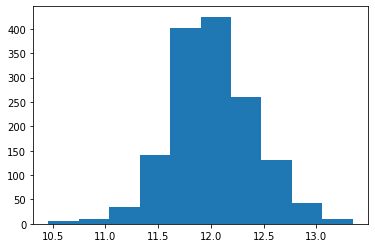

In [4]:
ylog = np.log(y)
plt.hist(ylog,bins=10)

In [5]:
# print(X_full.loc[list(np.where(y_pred>6e5)[0]),:])
# print(X_full_preproc[list(np.where(y_pred>6e5)[0]),:])
coldrop = []
nr = X_full.shape[0]
for col in  X_full.columns:
    if X_full[col].isnull().sum()>0:
        print(col,'\t',X_full[col].isnull().sum(),'\t',np.round(X_full[col].isnull().sum()/nr,3),'\t',X_full[col].nunique(),'\t',X_full[col].dtype)
    if X_full[col].isnull().sum()/nr > 0.7:
        coldrop.append(col)

print(coldrop)
colkeep = list(set(X_full.columns)-set(coldrop))
print(colkeep, len(colkeep))

LotFrontage 	 259 	 0.178 	 109 	 float64
Alley 	 1367 	 0.938 	 2 	 object
MasVnrType 	 8 	 0.005 	 4 	 object
MasVnrArea 	 8 	 0.005 	 326 	 float64
BsmtQual 	 37 	 0.025 	 4 	 object
BsmtCond 	 37 	 0.025 	 4 	 object
BsmtExposure 	 38 	 0.026 	 4 	 object
BsmtFinType1 	 37 	 0.025 	 6 	 object
BsmtFinType2 	 38 	 0.026 	 6 	 object
Electrical 	 1 	 0.001 	 5 	 object
FireplaceQu 	 690 	 0.473 	 5 	 object
GarageType 	 81 	 0.056 	 6 	 object
GarageYrBlt 	 81 	 0.056 	 97 	 float64
GarageFinish 	 81 	 0.056 	 3 	 object
GarageQual 	 81 	 0.056 	 5 	 object
GarageCond 	 81 	 0.056 	 5 	 object
PoolQC 	 1452 	 0.996 	 3 	 object
Fence 	 1178 	 0.808 	 4 	 object
MiscFeature 	 1404 	 0.963 	 4 	 object
['Alley', 'PoolQC', 'Fence', 'MiscFeature']
['Condition2', 'BedroomAbvGr', 'OpenPorchSF', 'Neighborhood', 'LandSlope', 'GarageQual', 'Utilities', 'Functional', 'WoodDeckSF', 'KitchenQual', 'Exterior2nd', 'LotFrontage', 'ScreenPorch', 'GarageFinish', 'RoofStyle', 'Heating', 'CentralAir', 

In [6]:
# extract out categorical and numerical columns
cat_col = [col for col in colkeep if X_full[col].dtype == 'object' and X_full[col].nunique() < 30 and 'Qu' not in col]
print(len(cat_col),cat_col)
numcolpop=['MSSubClass','YrSold','MoSold','MiscVal','3SsnPorch','ScreenPorch','PoolArea','LowQualFinSF','BsmtHalfBath','BsmtFinSF2','EnclosedPorch']
num_col = [col for col in colkeep if X_full[col].dtype in ["int64", "float64"] and col not in numcolpop]
print(len(num_col), num_col)

34 ['Condition2', 'Neighborhood', 'LandSlope', 'Utilities', 'Functional', 'Exterior2nd', 'GarageFinish', 'RoofStyle', 'Heating', 'CentralAir', 'SaleType', 'MasVnrType', 'SaleCondition', 'MSZoning', 'BsmtCond', 'BsmtFinType1', 'HeatingQC', 'PavedDrive', 'GarageType', 'BsmtFinType2', 'Exterior1st', 'LotShape', 'HouseStyle', 'ExterCond', 'BldgType', 'LandContour', 'BsmtExposure', 'Electrical', 'GarageCond', 'Foundation', 'RoofMatl', 'Street', 'Condition1', 'LotConfig']
25 ['BedroomAbvGr', 'OpenPorchSF', 'WoodDeckSF', 'LotFrontage', 'OverallQual', 'Fireplaces', 'YearRemodAdd', 'BsmtUnfSF', '2ndFlrSF', 'FullBath', '1stFlrSF', 'HalfBath', 'GarageYrBlt', 'GrLivArea', 'LotArea', 'OverallCond', 'MasVnrArea', 'YearBuilt', 'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'BsmtFinSF1', 'GarageCars', 'KitchenAbvGr', 'BsmtFullBath']


In [7]:
with pd.option_context('display.max_columns', 40):
    print(X_full[cat_col].describe(include=['object']))

       Condition2 Neighborhood LandSlope Utilities Functional Exterior2nd  \
count        1458         1458      1458      1458       1458        1458   
unique          8           25         3         2          7          16   
top          Norm        NAmes       Gtl    AllPub        Typ     VinylSd   
freq         1443          225      1380      1457       1358         504   

       GarageFinish RoofStyle Heating CentralAir SaleType MasVnrType  \
count          1377      1458    1458       1458     1458       1450   
unique            3         6       6          2        9          4   
top             Unf     Gable    GasA          Y       WD       None   
freq            605      1140    1426       1363     1265        863   

       SaleCondition MSZoning BsmtCond BsmtFinType1 HeatingQC PavedDrive  \
count           1458     1458     1421         1421      1458       1458   
unique             6        5        4            6         5          3   
top           Normal     

In [8]:
# for col in cat_col:
#     if 'Qu' in col:
#         print(col,X_full[col].unique())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'Ful

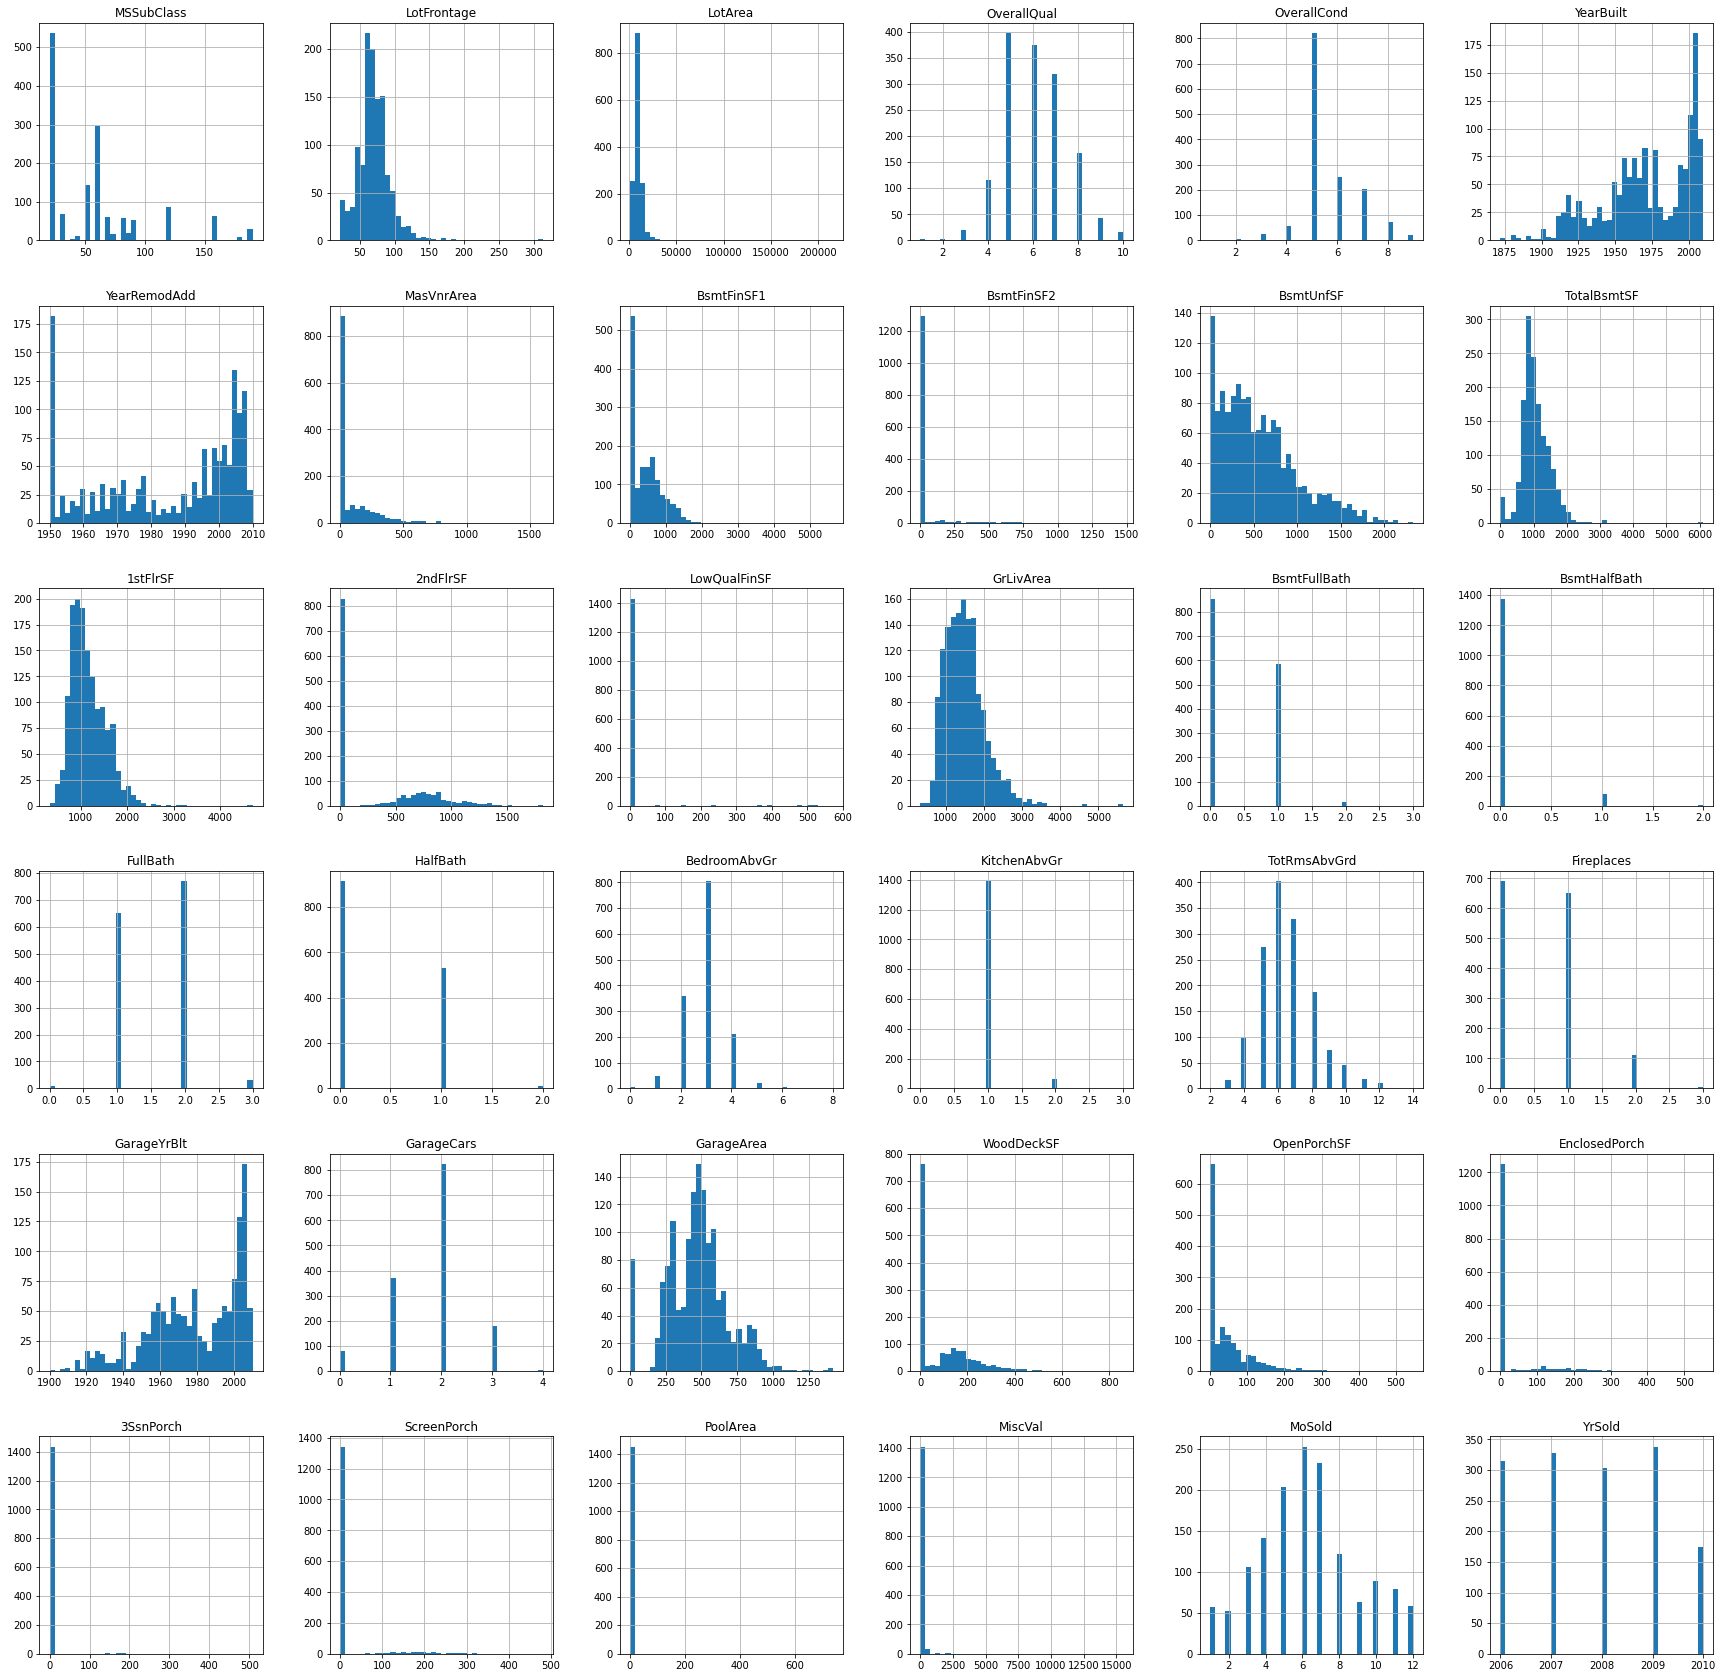

In [9]:
import seaborn as sns

fig = plt.figure(figsize=(30,30))
ax = fig.gca()
X_full.hist(ax=ax, bins=40)

['SalePrice', 'Condition2', 'Neighborhood', 'LandSlope', 'Utilities', 'Functional', 'Exterior2nd', 'GarageFinish', 'RoofStyle', 'Heating', 'CentralAir', 'SaleType', 'MasVnrType', 'SaleCondition', 'MSZoning', 'BsmtCond', 'BsmtFinType1', 'HeatingQC', 'PavedDrive', 'GarageType', 'BsmtFinType2', 'Exterior1st', 'LotShape', 'HouseStyle', 'ExterCond', 'BldgType', 'LandContour', 'BsmtExposure', 'Electrical', 'GarageCond', 'Foundation', 'RoofMatl', 'Street', 'Condition1', 'LotConfig', 'BedroomAbvGr', 'OpenPorchSF', 'WoodDeckSF', 'LotFrontage', 'OverallQual', 'Fireplaces', 'YearRemodAdd', 'BsmtUnfSF', '2ndFlrSF', 'FullBath', '1stFlrSF', 'HalfBath', 'GarageYrBlt', 'GrLivArea', 'LotArea', 'OverallCond', 'MasVnrArea', 'YearBuilt', 'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'BsmtFinSF1', 'GarageCars', 'KitchenAbvGr', 'BsmtFullBath']


<AxesSubplot:>

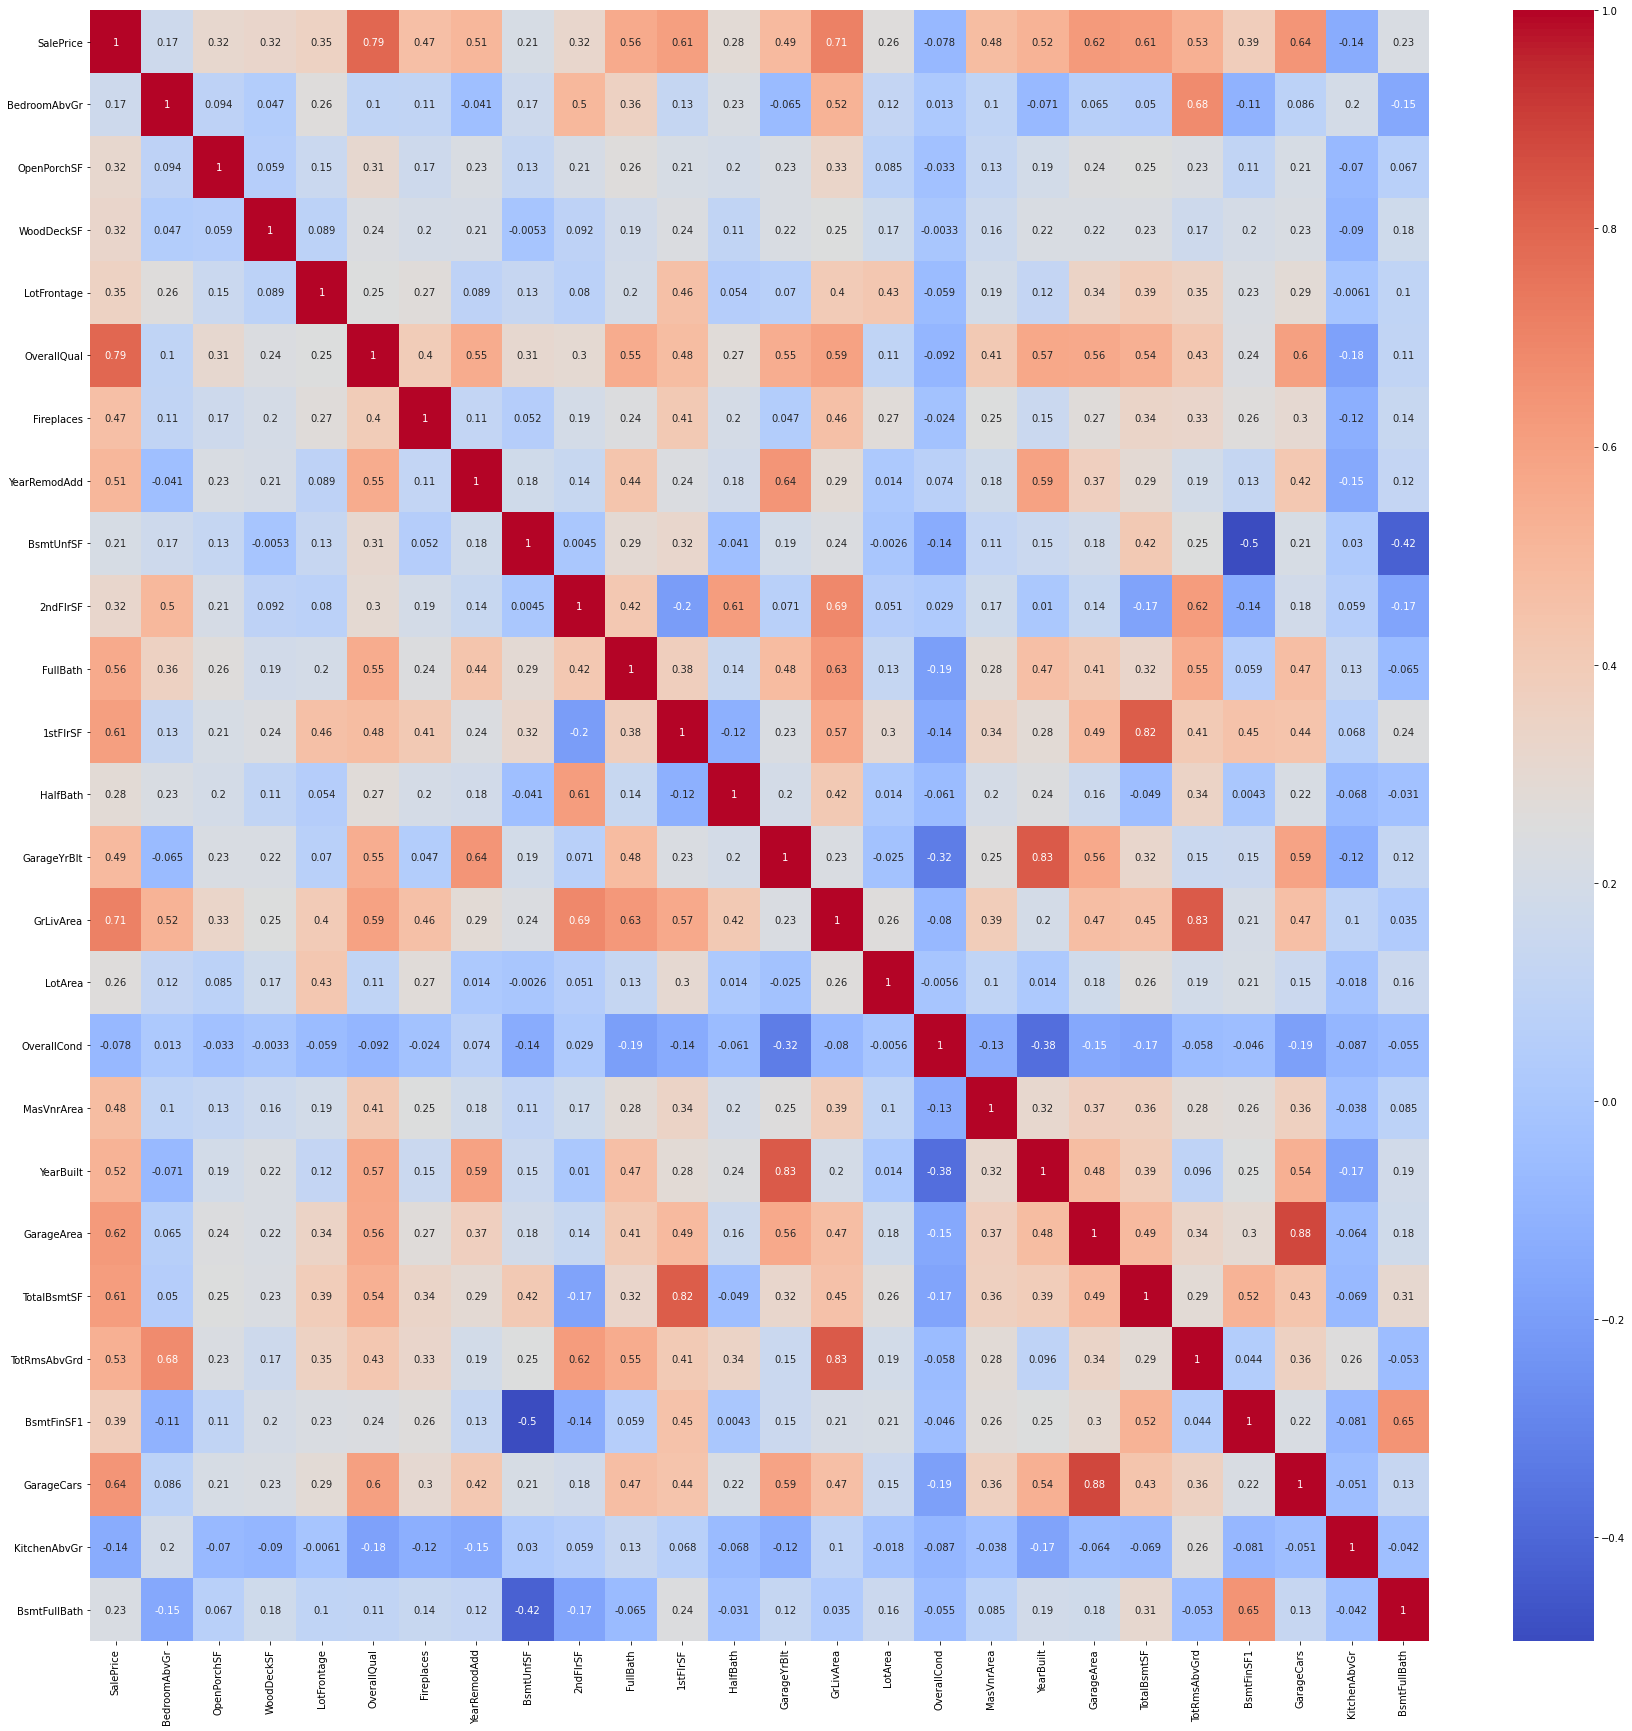

In [10]:
fig = plt.figure(figsize=(30,30))
feat = ['SalePrice']
for col in cat_col:
    feat.append(col)
for col in num_col:
    feat.append(col)
print(feat)
sns.heatmap(X_train_full[feat].corr(),annot=True,cmap='coolwarm')

In [11]:
# imput and encode
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_trans = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean")),
    ("normalize", StandardScaler())
    ])
cat_trans = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder",OneHotEncoder(handle_unknown="ignore", sparse=False))])
preproc = ColumnTransformer(transformers=[("num", num_trans, num_col),("cat",cat_trans, cat_col)]) 

X_full_preproc = preproc.fit_transform(X_full[colkeep])
X_test_full_preproc = preproc.transform(X_test_full[colkeep])

print(X_full_preproc.shape, X_test_full_preproc.shape)

(1458, 242) (1459, 242)


<AxesSubplot:>

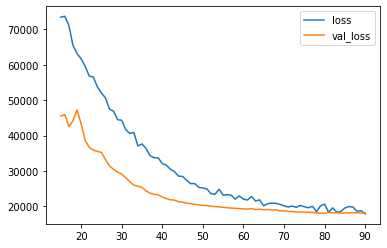

In [12]:
import tensorflow as tf
tf.random.set_seed(0)

model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=500, activation="selu", input_shape=X_full_preproc.shape),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=500, activation="selu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=500, activation="selu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=1, activation='relu'),
    ])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss="mean_absolute_error", metrics=["mae"])

earlystop = tf.keras.callbacks.EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)
callog = model.fit(X_full_preproc, y, validation_split=0.3,
          epochs=200, batch_size=256, steps_per_epoch=5, shuffle=True,callbacks=[earlystop],verbose=False)

opttrace = pd.DataFrame(callog.history)
# print(opttrace.columns)
opttrace.loc[15:,['loss','val_loss']].plot()
# opttrace.loc[15:,['mse','val_mse']].plot()



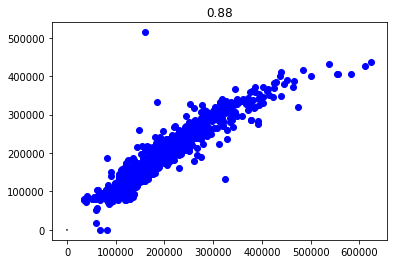

In [13]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_full_preproc)


import matplotlib.pyplot as plt
plt.plot(y,y_pred,'bo')
# plt.axis('scaled')
# plt.xlim([0,1e6])
# plt.ylim([0,1e6])
plt.plot([10,14],[10,14],'k')
plt.title(np.round(r2_score(y,y_pred),3))
plt.show()

In [14]:
pred_test = model.predict(X_test_full_preproc)
print(pred_test[:,0].shape)
output = pd.DataFrame({'Id': X_test_full.index,
                       'SalePrice': pred_test[:,0]})
output.to_csv('submission.csv', index=False)

(1459,)
